## Data Preprocsssing
- 영상 데이터 전처리

### 환경구성

#### 설치 라이브러리

```python
!pip install opencv-python
```

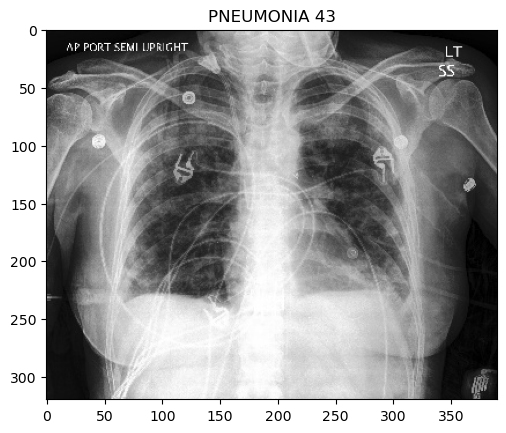

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
# !pip install opencv-python
import cv2

# data 경로 설정
# C:\workspace\Pneumonia\Positive
data_dir = 'C:/workspace/Pneumonia/Positive/'
# categories = ['train','test','val'] # 전처리된 데이터셋을 훈련용, 평가용, 검증용으로 구분

# 샘플 이미지 시각화
img_name = os.listdir(data_dir)[42]
img_path = os.path.join(data_dir, img_name)
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) # rgb 채널을 1개로 줄여서 데이터의 크기를 낮춘다

plt.imshow(img, cmap='gray')
plt.title('PNEUMONIA 43')
plt.show()

### Image Resize

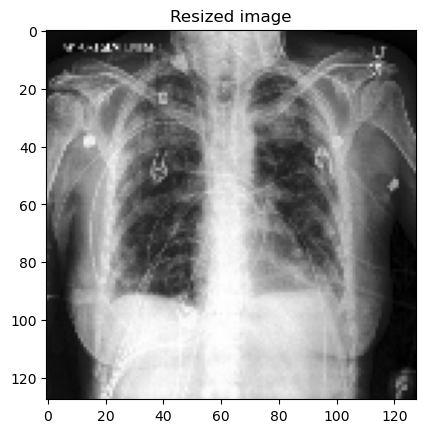

In [3]:
def resize_image(img, size=(128,128)):
    return cv2.resize(img,size)

resize_img = resize_image(img)
plt.imshow(resize_img, cmap='gray')
plt.title('Resized image')
plt.show()
# 1:1 비율이 아닌 이미지를 resize 할 경우 왜곡이 발생할 수 있음 -> padding 작업 필요

### Histogram Equalization
- image level 평활화

In [4]:
import cv2
?cv2.equalizeHist

Docstring:
equalizeHist(src[, dst]) -> dst
.   @brief Equalizes the histogram of a grayscale image.
.   
.   The function equalizes the histogram of the input image using the following algorithm:
.   
.   - Calculate the histogram \f$H\f$ for src .
.   - Normalize the histogram so that the sum of histogram bins is 255.
.   - Compute the integral of the histogram:
.   \f[H'_i =  \sum _{0  \le j < i} H(j)\f]
.   - Transform the image using \f$H'\f$ as a look-up table: \f$\texttt{dst}(x,y) = H'(\texttt{src}(x,y))\f$
.   
.   The algorithm normalizes the brightness and increases the contrast of the image.
.   
.   @param src Source 8-bit single channel image.
.   @param dst Destination image of the same size and type as src .
Type:      builtin_function_or_method

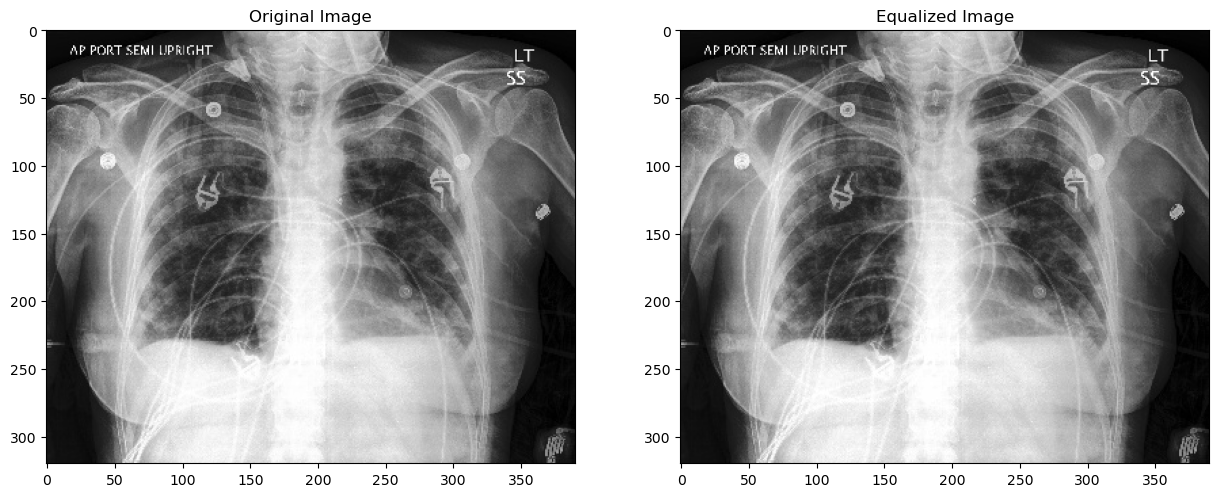

In [5]:
def he_img(img):
    return cv2.equalizeHist(img) # 명암을 평활화 시킨다.

equalized_img = he_img(img)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.show()

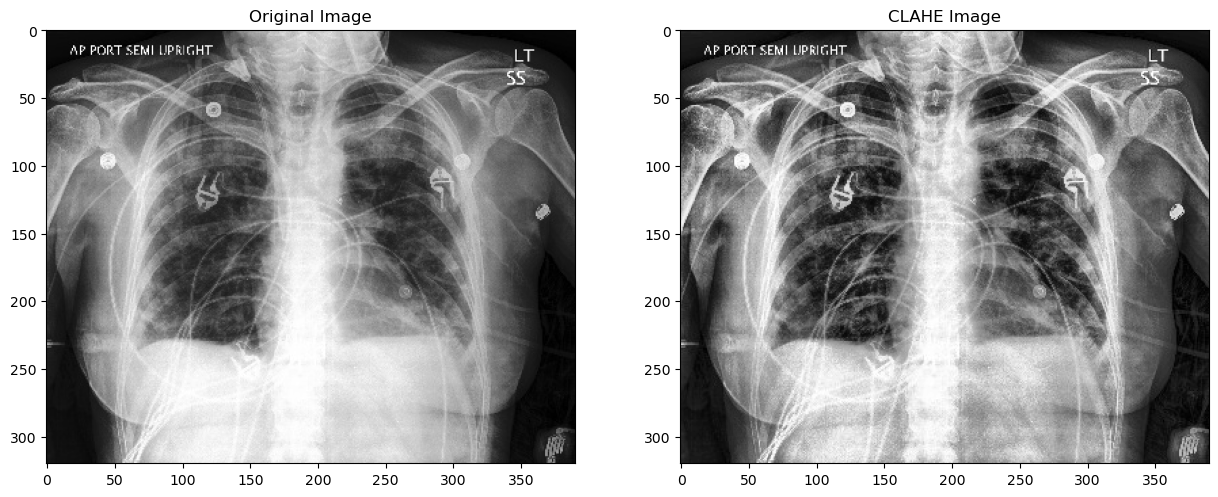

In [6]:
# Histogram Equalization CLAHE(Contrast Limited Adaptive Histogram Equalization)
def clahe_image(img):
    clahe = cv2.createCLAHE(clipLimit=2., tileGridSize=(8,8))   
    cl_img = clahe.apply(img)
    return cl_img

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(clahe_image(img), cmap='gray')
plt.title('CLAHE Image')
plt.show()

### Data Agumentatation
- 데이터의 수를 증가시켜 학습, 평가용 데이터를 추가 확보
- 데이터의 표본(n수)이 적을 때 주로 사용

In [7]:
import tensorflow

### Noise Reduction

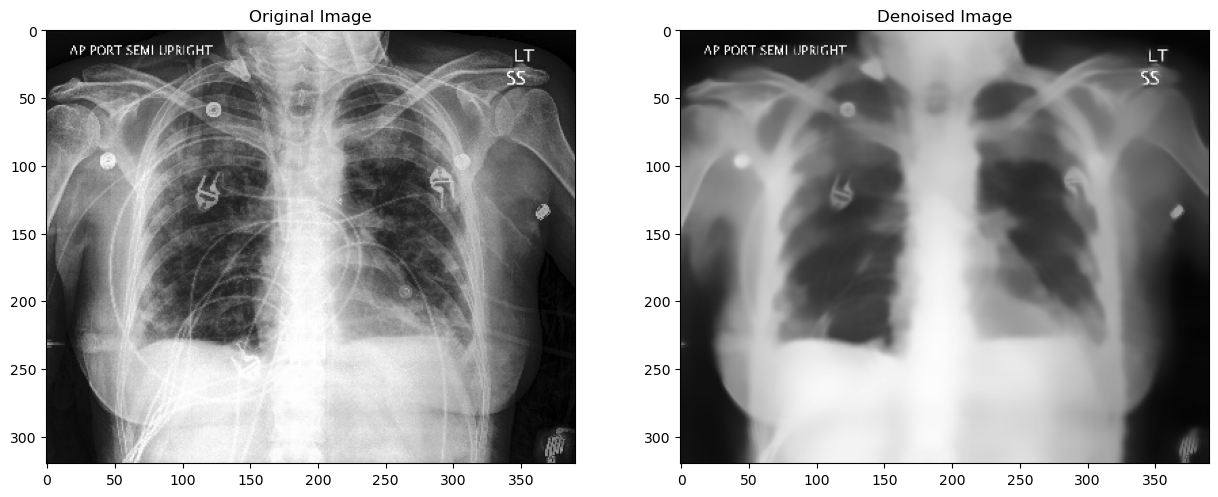

In [8]:
def denoise_img(img):
    return cv2.fastNlMeansDenoising(img, None, 30, 7, 21)

denoised_img = denoise_img(img)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(denoised_img, cmap='gray')
plt.title('Denoised Image')
plt.show()


### Image Normalization
- 데이터 정규화 처리
- 연산 효율 높이고 정규성을 생성

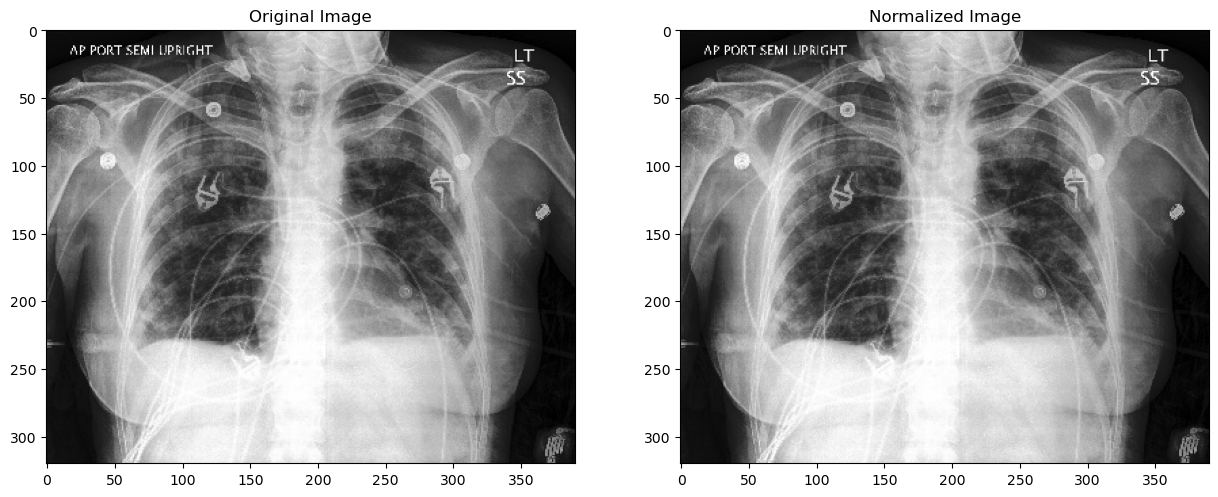

In [9]:
def normalize_img(img):
    return cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

normalized_img = normalize_img(img)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(normalized_img, cmap='gray')
plt.title('Normalized Image')
plt.show()

### Edge Detection

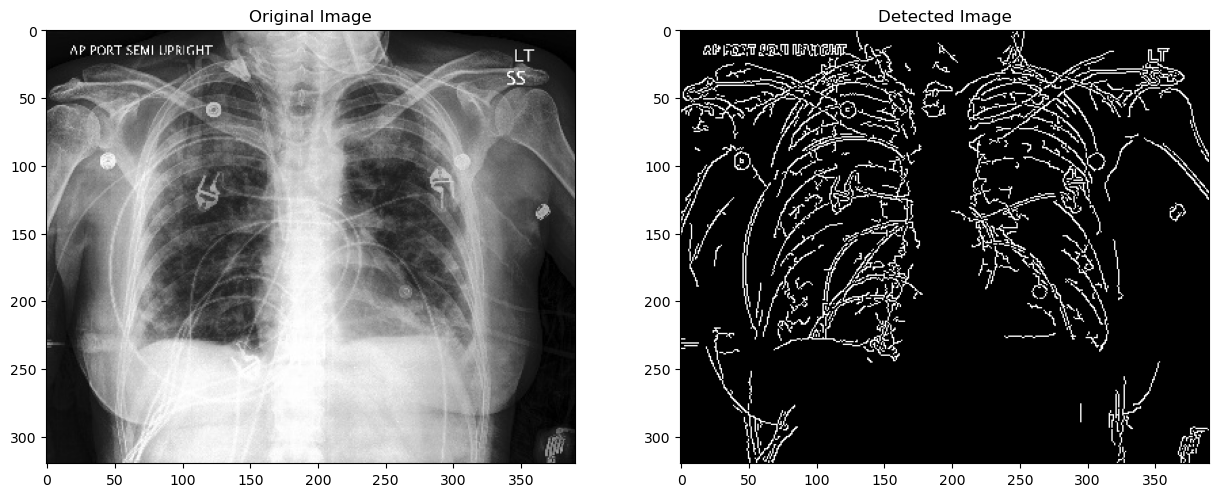

In [10]:
def detect_edge(img):
    return cv2.Canny(img, 100, 200)

detected_img = detect_edge(img)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(detected_img, cmap='gray')
plt.title('Detected Image')
plt.show()

### Blurring

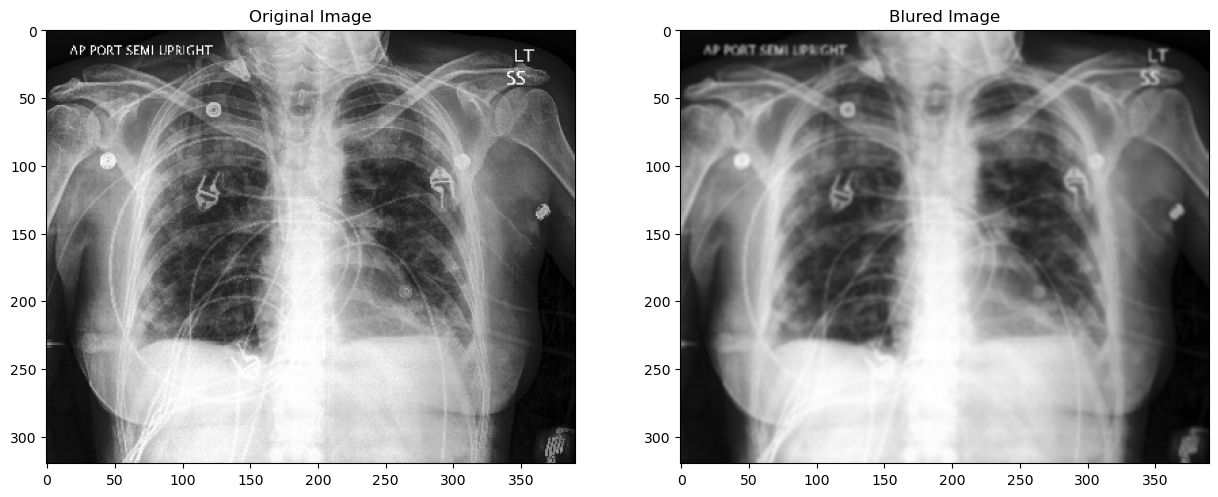

In [11]:
def blur_img(img):
    return cv2.GaussianBlur(img, (5,5), 0) # 가우시안 분포 =(유사) 정규분포

blured_img = blur_img(img)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(blured_img, cmap='gray')
plt.title('Blured Image')
plt.show()

### Contour Detection

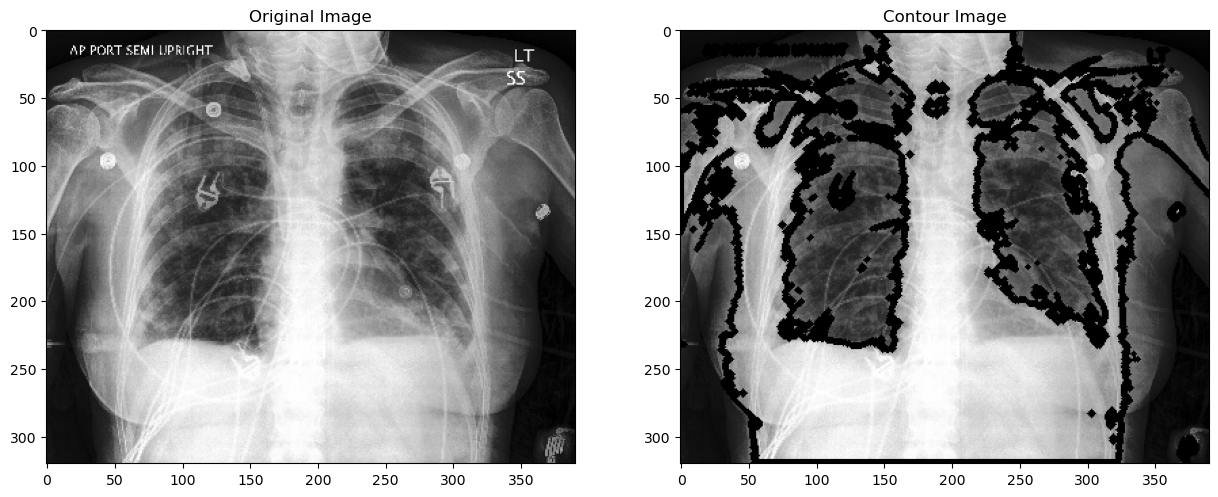

In [12]:
def find_contour(img):
    ret, thresh = cv2.threshold(img, 127, 255, 0)
    contours, hiearchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # 윤곽선
    return contours

contours = find_contour(img)
contour_img = cv2.drawContours(img.copy(), contours, -1, (0,255,0),3)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(contour_img, cmap='gray')
plt.title('Contour Image')
plt.show()

### Data Preparing

In [13]:
def load_data(data_dir): # 데이터 전처리 함수
    images = []
    # labels = []
    for img_path in os.listdir(data_dir):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = resize_image(img)
        img = clahe_image(img)
        img = normalize_img(img)
        images.append(img)
    
    prepared_datas = np.array(images)
    return prepared_datas



In [14]:
# 딥러닝
# bias 편향치
# 활성화 함수 : 모든 데이터를 컴퓨터로 보내면 컴퓨터에 과부하 걸릴 수 있으므로 입력신호가 출력 결과에 미치는 영향을 조절
# step function, sigmoid(이진분류), tanh(자연어 처리), ReLU(음수값을 싹다 0으로)
# 은닉층을 이용하여 XOR 문제 해결 -> 심층 신경망
# 손실함수를 최소화 하기 위해 가중치 조정 : crossentropy, MSE,MAE
# 역전파 = 편미분 -> 기울기 소실 가능성 있음
# 경사하강법 : 기울기가 최소일 때 가장 좋은 확률 / 손실률이 줄었기 때문에 기울기가 줄어들었다!
# 기울기 폭발과 소실 - 폭발 : 역전파 시 변화율이 기하급수적으로 커짐 / 소실 : 기울기가 0으로 수렴 --> 학습 불가능 해짐